In [2]:
print(__doc__)

import pandas as pd
import numpy as np

import time 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline 

Automatically created module for IPython interactive environment


In [3]:
#change if necessary to get different clusters
np.random.seed(123)

#downloaded from UCI Machine Repository
original = pd.read_csv('A3_OnlineNewPopularity_sharegrps_labeled.csv')

In [4]:
original.head()
us_file = original.drop(labels=['url', ' timedelta', 'shares_2', 'shares_3', 'shares_5', 'shares_log'], axis=1)
#print us_file.head()
mylabels_2 = original['shares_2']
mylabels_3= original['shares_3']
mylabels_5 = original['shares_5']
#us_file.columns

In [5]:
#scaled data 
temp = us_file.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
temp_scaled = min_max_scaler.fit_transform(temp)
normalized = pd.DataFrame(temp_scaled)

In [6]:
#set variables for normalized data
data_norm = np.array(normalized)
X_norm = data_norm
n_samples, n_features = data_norm.shape
sample_size = 500

In [7]:
#set variables
data = np.array(us_file)
X = data

In [8]:
n_clusters = 5

##############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

y = k_means_labels
target = y
us_file['kmeans_cluster_labels_5'] = k_means_labels
print k_means_labels
print us_file.columns

[1 1 1 ..., 0 0 2]
Index([u' n_tokens_title', u' n_tokens_content', u' n_unique_tokens',
       u' n_non_stop_words', u' n_non_stop_unique_tokens', u' num_hrefs',
       u' num_self_hrefs', u' num_imgs', u' num_videos',
       u' average_token_length', u' num_keywords',
       u' data_channel_is_lifestyle', u' data_channel_is_entertainment',
       u' data_channel_is_bus', u' data_channel_is_socmed',
       u' data_channel_is_tech', u' data_channel_is_world', u' kw_min_min',
       u' kw_max_min', u' kw_avg_min', u' kw_min_max', u' kw_max_max',
       u' kw_avg_max', u' kw_min_avg', u' kw_max_avg', u' kw_avg_avg',
       u' self_reference_min_shares', u' self_reference_max_shares',
       u' self_reference_avg_sharess', u' weekday_is_monday',
       u' weekday_is_tuesday', u' weekday_is_wednesday',
       u' weekday_is_thursday', u' weekday_is_friday', u' weekday_is_saturday',
       u' weekday_is_sunday', u' is_weekend', u' LDA_00', u' LDA_01',
       u' LDA_02', u' LDA_03', u' LDA_04

In [36]:
# MEMORY ERROR, NOT RUNNING FOR ASSIGNMENT
# n_digits =2
# ###############################################################################
# # Visualize the results on PCA-reduced data

# reduced_data = PCA(n_components=30).fit_transform(X)
# kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# #kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
# y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

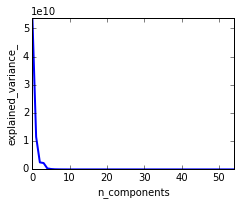

In [184]:
######### SAME AS SCREE PLOTS AT THE END OF THIS NOTEBOOK #############

import numpy as np
import matplotlib.pyplot as plt

from sklearn.grid_search import GridSearchCV

components_range = [2,3,4,5,6,7,8,9,10,15, 20, 25, 30, 35, 40, 45, 50, 55]
for n in components_range: 
    pca = PCA(n_components=n, copy=True, whiten=True)

    pca.fit(X)

    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_')


[ 0.76136147  0.16351986  0.03526188  0.0319923 ]


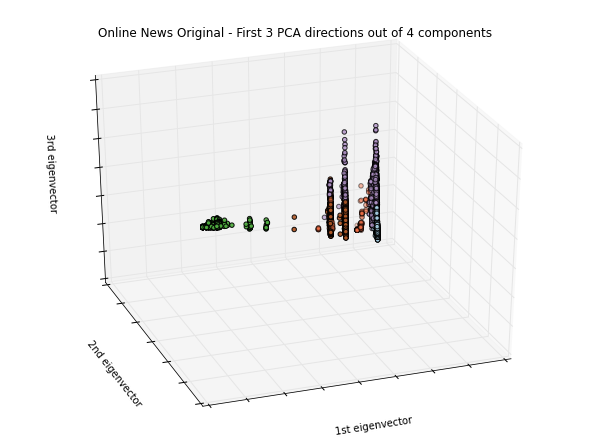

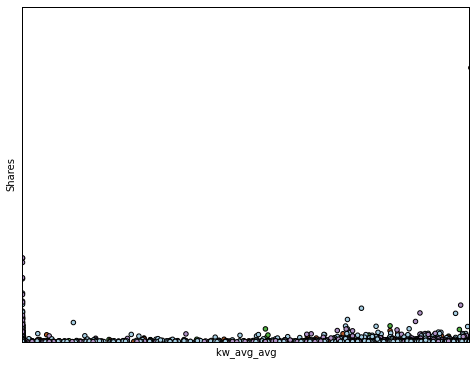

In [191]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA

############# VISUALIZATION FOR NORMAL DATA #################
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 58].min() - .5, X[:, 58].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 26], X[:, 58], c=y, cmap=plt.cm.Paired)
plt.xlabel('kw_avg_avg ')
plt.ylabel('Shares')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Paired)
ax.set_title("Online News Original - First 3 PCA directions out of 4 components")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

pca_score = pca.explained_variance_ratio_
V = pca.components_

print pca_score
#print V

[ 0.76136147  0.16351986  0.03526188  0.0319923 ]


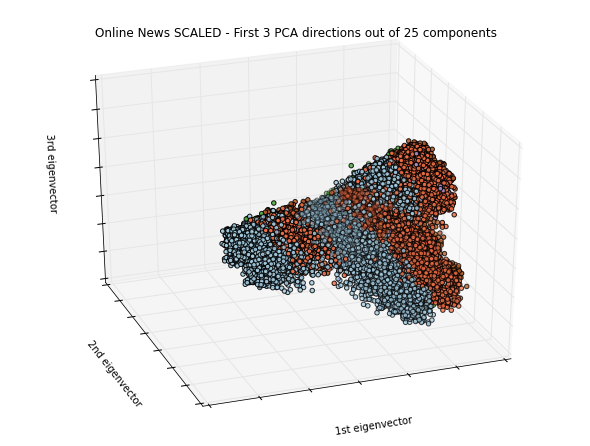

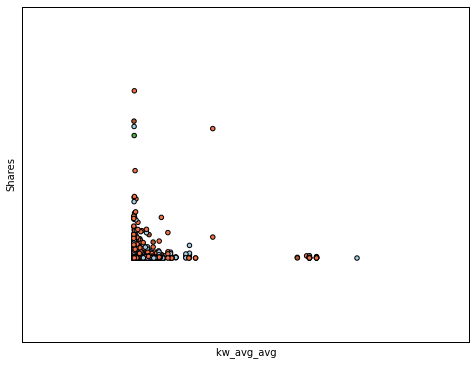

In [202]:
############ VISUALIZATION FOR SCALED DATA #################
x_min_norm, x_max_norm = X_norm[:, 2].min() - .5, X_norm[:, 2].max() + .5
y_min_norm, y_max_norm = X_norm[:, 58].min() - .5, X_norm[:, 58].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_norm[:, 26], X_norm[:, 58], c=y, cmap=plt.cm.Paired)
plt.xlabel('kw_avg_avg ')
plt.ylabel('Shares')

plt.xlim(x_min_norm, x_max_norm)
plt.ylim(y_min_norm, y_max_norm)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
pca_norm = PCA(n_components=25)
X_reduced_norm = pca_norm.fit_transform(X_norm)
ax.scatter(X_reduced_norm[:, 0], X_reduced_norm[:, 1], X_reduced_norm[:, 2], c=y,
           cmap=plt.cm.Paired)
ax.set_title("Online News SCALED - First 3 PCA directions out of 25 components")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

pca_score = pca.explained_variance_ratio_
V = pca.components_

print pca_score
#print V

(-600000.0, 1000000.0, -400000.0, 800000.0)

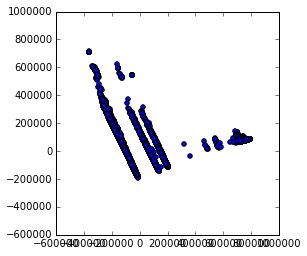

In [211]:
from sklearn.decomposition import PCA, FastICA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

#print pca.components_
#print 'means:', pca.mean_
#print 'explained:', pca.explained_variance_ratio_ 
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal');
#print np.cov(X_pca, rowvar=False)

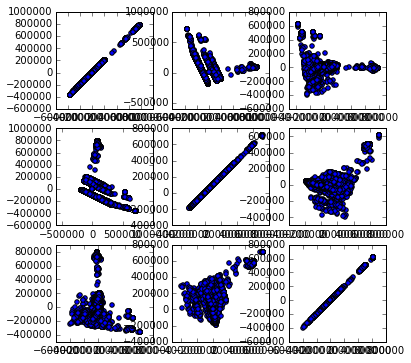

In [212]:
plt.figure(figsize=(8,8))
for i in xrange(3):
    for j in xrange(3):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_pca[:,i], X_pca[:,j])
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c='b')
        plt.axis('equal')

Automatically created module for IPython interactive environment
best n_components by PCA CV = 10
best n_components by FactorAnalysis CV = 0
best n_components by PCA CV = 20
best n_components by FactorAnalysis CV = 0


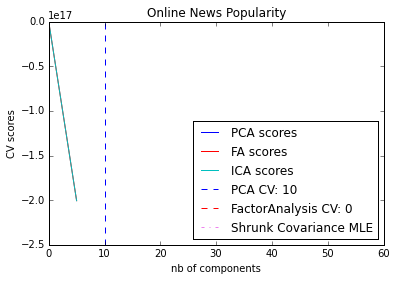

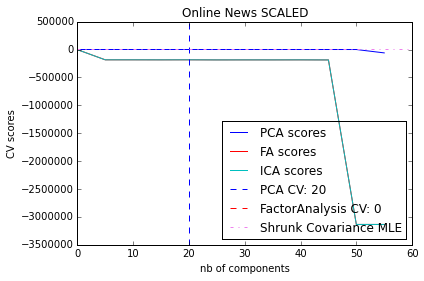

In [209]:
print(__doc__)

# Authors: Alexandre Gramfort
#          Denis A. Engemann
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

###############################################################################
# Use data from online news popularity
#set variables
# data = np.array(us_file)
# X_o = data
# n_samples, n_features = data.shape
# sample_size = 500


#rank = 15 #what does this do
#sigma = 1.
#rng = np.random.RandomState(42)
#U, _, _ = linalg.svd(rng.randn(n_features, n_features))
#X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# # Adding homoscedastic noise
# X_homo = X + sigma * rng.randn(n_samples, n_features)

# # Adding heteroscedastic noise
# sigmas = sigma * rng.rand(n_features) + sigma / 2.
# X_hetero = X + rng.randn(n_samples, n_features) * sigmas

###############################################################################
# Fit the models

n_components = np.arange(0, n_features, 5)  # options for n_components

def compute_scores(fields):
    pca = PCA()
    fa = FactorAnalysis()
#    ica = FastICA()

    pca_scores, fa_scores, ica_scores = [], [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
#        ica.n_components = n 
        pca_scores.append(np.mean(cross_val_score(pca, fields)))
        fa_scores.append(np.mean(cross_val_score(fa, fields)))
#        ica_scores.append(np.mean(cross_val_score(ica, fields, scoring=ica.mixing_ )))
    
    return pca_scores, fa_scores


def shrunk_cov_score(fields):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
    return np.mean(cross_val_score(cv.fit(fields).best_estimator_, fields))


def lw_score(fields):
    return np.mean(cross_val_score(LedoitWolf(), fields))


for xi, title in [(X, 'Online News Popularity'), (X_norm, 'Online News SCALED')]:

    pca_scores, fa_scores = compute_scores(xi)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]
#    n_components_ica = n_components[np.argmax(ica_scores)]

#     pca = PCA(n_components='mle')
#     pca.fit(xi)
#     n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
#    print("best n_components by ICA CV = %d" % n_components_ica)
#   print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    plt.plot(n_components, fa_scores, 'c', label='ICA scores')
#     plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa, linestyle='--')
#     plt.axvline(n_components_ica, color='r',
#                 label='ICA CV: %d' % n_components_ica, linestyle='--')
#     plt.axvline(n_components_pca_mle, color='k',
#                 label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
    plt.axhline(shrunk_cov_score(xi), color='violet',
                label='Shrunk Covariance MLE', linestyle='-.')
#     plt.axhline(lw_score(xi), color='orange',
#                 label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

In [107]:
us_file.index.values

array([    0,     1,     2, ..., 39641, 39642, 39643])

In [155]:
################### MORE PCA AND SCREE PLOTS #################################
##############################################################################
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
new_data = pca.fit_transform(us_file) 

df_pca = pd.DataFrame(new_data, columns=['pca_{:}'.format(i) for i in range(1, 11)])
df_pca['label'] = target # pass in as array just in case indexing was offset
df_pca['id'] = us_file.index
df_pca.to_csv('mydatafile_pca11.csv', index=False)

print 'normalized eigenvalues: ',pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected components.
                                    #Eigenvalues (normalized) for scree plot
# print pca.n_components_
# print pca.noise_variance_
# print pca.score(us_file)
# print 'covariance matrix: ', pca.get_covariance() #Covariance Matrix
# print 'Eigenvectors: ', pca.components_

normalized eigenvalues:  [  7.61361472e-01   1.63519855e-01   3.52618823e-02   3.19923011e-02
   4.91968036e-03   1.90779745e-03   6.12226408e-04   2.86488228e-04
   1.14611065e-04   1.67786885e-05]


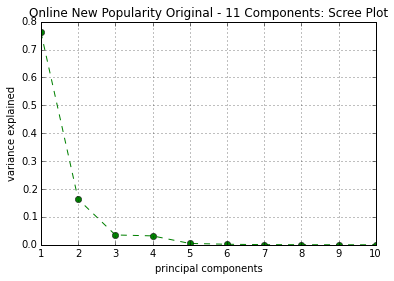

In [157]:
features = [x for x in range(1,11)]
plt.figure(3)
# percentage of variance explained by each of the selected components.
# The sum of explained variances is equal to 1.0
plt.plot(features, pca.explained_variance_ratio_, 'g--', marker='o')
plt.grid(True)
plt.xlabel("principal components"), plt.ylabel("variance explained")
plt.title("Online New Popularity Original - 11 Components: Scree Plot")
plt.savefig("scree_plot1.png")

In [145]:
#PCA via numpy
s, e = np.linalg.eig(np.cov(X.transpose())) #eigenvalue decomposition
o=np.argsort(s)[::-1]
(X - X.mean()).dot(e[:,o]) / np.sqrt(s[o])

array([[ -1.08400161e-01,  -1.35962040e-01,  -1.04103001e-01, ...,
         -9.54926522e+09,  -2.35685655e+13,              nan],
       [ -1.08445426e-01,  -1.36213252e-01,  -9.97410735e-02, ...,
         -9.54926522e+09,  -2.35685655e+13,              nan],
       [ -1.08357753e-01,  -1.35703911e-01,  -1.08011560e-01, ...,
         -9.54926522e+09,  -2.35685655e+13,              nan],
       ..., 
       [  3.72863990e+00,  -1.00474170e+00,  -1.29933881e-01, ...,
         -9.54926522e+09,  -2.35685655e+13,              nan],
       [  3.65227064e+00,  -1.35290352e+00,  -1.49799081e-02, ...,
         -9.54926522e+09,  -2.35685655e+13,              nan],
       [  3.89270365e+00,   1.12154263e-01,   3.16407379e+00, ...,
         -9.54926522e+09,  -2.35685655e+13,              nan]])

In [115]:
print df_pca.describe()

              pca_1         pca_2         pca_3         pca_4         pca_5  \
count  3.964400e+04  3.964400e+04  3.964400e+04  3.964400e+04  3.964400e+04   
mean  -9.020983e-12 -1.315560e-11  3.758743e-12 -7.517486e-13  3.406361e-13   
std    2.316416e+05  1.073510e+05  4.985099e+04  4.748362e+04  1.862042e+04   
min   -3.647792e+05 -1.897401e+05 -3.969760e+05 -1.266597e+06 -5.905387e+05   
25%   -1.096130e+05 -7.924302e+04 -1.590242e+04 -2.580518e+03 -7.336928e+02   
50%   -6.980677e+04 -2.175133e+04  4.583187e+02  5.083286e+03  3.552349e+02   
75%   -2.811173e+04  7.164486e+04  1.662174e+04  1.278531e+04  9.668710e+02   
max    7.914613e+05  7.151747e+05  6.183607e+05  6.111349e+04  3.680853e+05   

              label            id  
count  39644.000000  39644.000000  
mean       1.131319  19821.500000  
std        1.440111  11444.381373  
min        0.000000      0.000000  
25%        0.000000   9910.750000  
50%        0.000000  19821.500000  
75%        2.000000  29732.250000  


In [169]:
####PCA with scaled data AND SCREE PLOTS ###########################
####################################################################
temp = us_file.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 5))
temp_scaled = min_max_scaler.fit_transform(temp)
normalized = pd.DataFrame(temp_scaled)

In [173]:
pca_norm = PCA(n_components=40)
new_data_norm = pca_norm.fit_transform(normalized) 

df_pca_norm = pd.DataFrame(new_data_norm, columns=['pca_{:}'.format(i) for i in range(1, 41)])
df_pca_norm['label'] = target # pass in as array just in case indexing was offset
df_pca_norm['id'] = normalized.index
df_pca_norm.to_csv('News_norm_pca40.csv', index=False)

print 'norm data - normalized eigenvalues: ',pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected components.
                                    #Eigenvalues (normalized) for scree plot
# print pca.n_components_
# print pca.noise_variance_
# print pca.score(us_file)
# print 'covariance matrix: ', pca.get_covariance() #Covariance Matrix
# print 'Eigenvectors: ', pca.components_

norm data - normalized eigenvalues:  [ 0.10010178  0.09043013  0.07898784  0.06508417  0.0612483   0.05979724
  0.05892497  0.05519111  0.04922545  0.04713598  0.04200619  0.0389944
  0.03276975  0.02538944  0.0226719   0.02186255  0.0209474   0.02051
  0.01984805  0.01136881  0.01070823  0.00880408  0.00805112  0.00735578
  0.00683418]


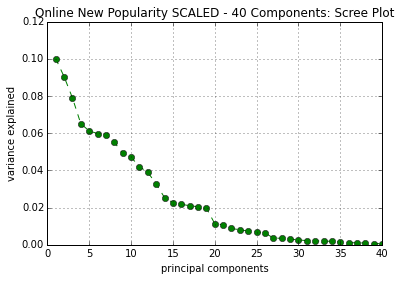

In [174]:
features = [x for x in range(1,41)]
plt.figure(3)
# percentage of variance explained by each of the selected components.
# The sum of explained variances is equal to 1.0
plt.plot(features, pca_norm.explained_variance_ratio_, 'g--', marker='o')
plt.grid(True)
plt.xlabel("principal components"), plt.ylabel("variance explained")
plt.title("Online New Popularity SCALED - 40 Components: Scree Plot")
plt.savefig("scree_plot1.png")

In [9]:
################# Fast ICA inspection ############################################
##############################################################################

ica_1 = FastICA(n_components = 10, algorithm='deflation', whiten=False, w_init=None, random_state=10)
ica_data = ica_1.fit(X) 
independent_components = ica_data.components_[scipy.stats.kurtosistest(ica_data.components_)[1] < 0.05]
print independent_components
#Tests whether a dataset has normal kurtosis

ICA_features = [x for x in range(1,11)]
plt.figure(3)
# percentage of variance explained by each of the selected components.
# The sum of explained variances is equal to 1.0
plt.plot(features, independent_components , 'g--', marker='o')
plt.grid(True)
plt.xlabel("independent components"), plt.ylabel("kurtosistest values")
plt.title("Online New Popularity - 10 Components:  Plot")
plt.savefig("ICA_News_plot1.png")

/usr/local/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:271: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')


NameError: name 'scipy' is not defined